# Simple Linear Regression. Minimal example

# Using the same code as before, please solve the following exercises
    1. Change the number of observations to 100,000 and see what happens.
    2. Change the number of observations to 1,000,000 and see what happens.
    3. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe. 
    4. Change the loss function. L2-norm loss (without dividing by 2) is a good way to start. 
    5. Тry with the L1-norm loss, given by the sum of the ABSOLUTE value of yj - tj. The L1-norm loss is given by:
## $$ \Sigma_i = |y_i-t_i| $$
    6. Create a function f(x,z) = 13*xs + 7*zs - 12. Does the algorithm work in the same way?
    
    
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All
If you don't do that, your algorithm will keep the OLD values of all parameters.

You can either use this file for all the exercises, or check the solutions of EACH ONE of them in the separate files we have provided. All other files are solutions of each problem. If you feel confident enough, you can simply change values in this file. Please note that it will be nice, if you return the file to starting position after you have solved a problem, so you can use the lecture as a basis for comparison.

### Import the relevant libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [20]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


### Generate the targets we will aim at

In [21]:
noise = np.random.uniform(-1, 1, (observations,1))

targets = 13*xs + 7*zs - 12 + noise

print (targets.shape)

(1000, 1)


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

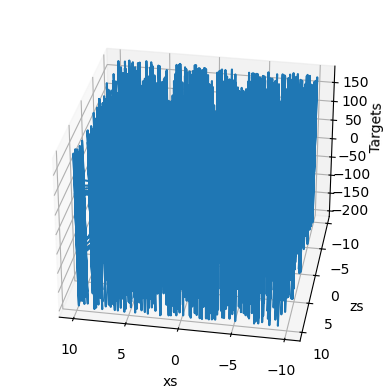

In [22]:
targets = targets.reshape(observations,)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, zs, targets)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)

plt.show()

targets = targets.reshape(observations,1)

### Initialize variables

In [23]:
init_range = 0.1

weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print (weights)
print (biases)

[[ 0.05322991]
 [-0.04842359]]
[0.01235919]


### Set a learning rate

In [24]:
learning_rate = 0.02

### Train the model

In [34]:
for i in range (100):
    
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
        
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print (loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    

0.16431629621424243
0.1643162962127131
0.16431629621124472
0.16431629620983432
0.1643162962084795
0.16431629620717825
0.1643162962059286
0.16431629620472818
0.1643162962035753
0.16431629620246818
0.16431629620140487
0.16431629620038327
0.16431629619940222
0.16431629619845978
0.16431629619755508
0.16431629619668597
0.16431629619585095
0.1643162961950491
0.1643162961942788
0.16431629619353916
0.1643162961928291
0.16431629619214647
0.16431629619149107
0.1643162961908618
0.16431629619025734
0.16431629618967633
0.16431629618911864
0.16431629618858307
0.16431629618806876
0.16431629618757462
0.16431629618710009
0.1643162961866442
0.1643162961862065
0.16431629618578572
0.16431629618538204
0.16431629618499427
0.16431629618462162
0.16431629618426352
0.16431629618391996
0.16431629618359
0.16431629618327293
0.16431629618296845
0.16431629618267626
0.16431629618239527
0.16431629618212526
0.16431629618186588
0.16431629618161717
0.16431629618137822
0.1643162961811486
0.16431629618092836
0.164316296180

### Print weights and biases and see if we have worked correctly.

In [35]:
print (weights, biases)


[[13.00275375]
 [ 6.99820019]] [-11.98465402]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

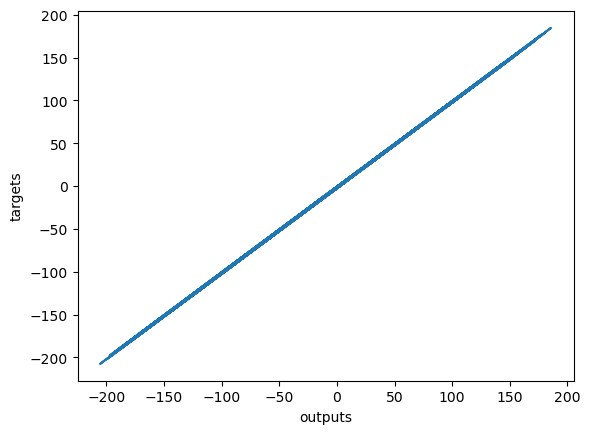

In [27]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()